In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm#, rdpg
from graspy.utils import symmetrize
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings("ignore")
FONTSIZE = 30

In [2]:
def double_plot(A, B):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.heatmap(B, ax=ax[1], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    ax[0].set_title('Adjacency matrix A', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency matrix B',fontsize=FONTSIZE)
    return ax

In [3]:
def rho_sbm(rho,k,L,n=100):
    L = symmetrize(L)
    A = binary_sbm([int(n/k)]*k, L)
    BL = np.repeat(np.repeat(L,n//k,0),n//k,1)
    B = np.random.binomial(1,(1-rho)*BL + rho*A)
    np.fill_diagonal(B,0)
    return A,B

In [4]:
n = 100
k = 4
L = np.array([
    [0.9, 0.11, 0.13, 0.2],
    [0, 0.7, 0.1, 0.1], 
    [0, 0, 0.8, 0.1],
    [0, 0, 0, 0.85]
])

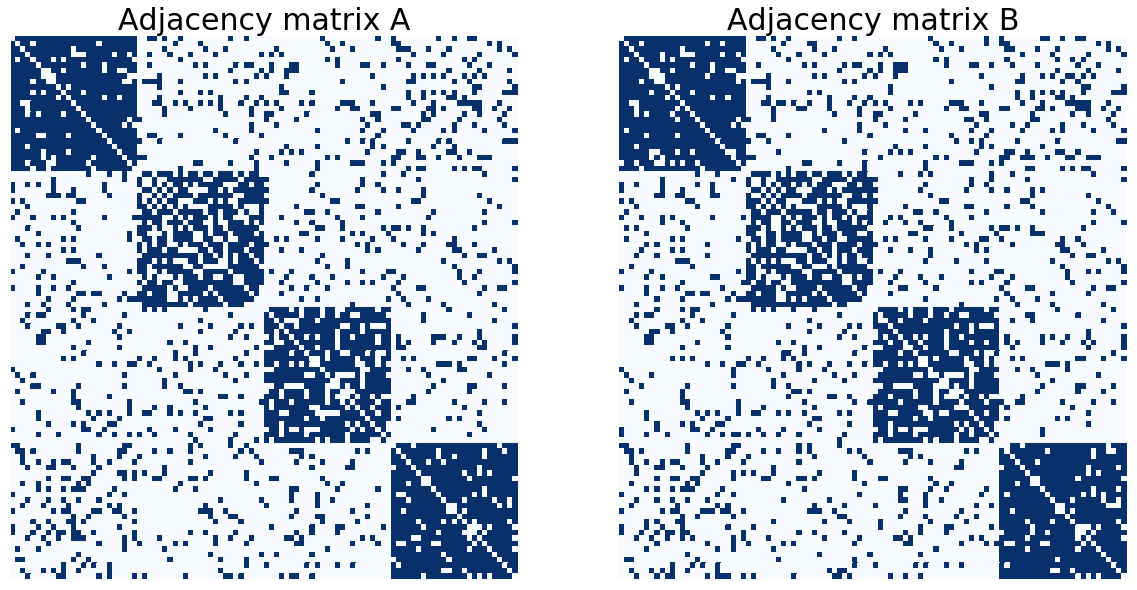

(2, 10000)
0.9414826268745963
15.588457268119896


In [5]:
A,B = rho_sbm(.9,k,L,n)
double_plot(A,B)
plt.show()
x = np.vstack((A.ravel(),B.ravel()))
print(x.shape)
print(np.corrcoef(x)[0,1])
print(np.linalg.norm(A-B))

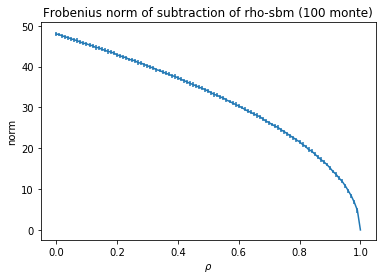

In [6]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        diffs.append(np.linalg.norm(A-B))
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('Frobenius norm of subtraction of rho-sbm (100 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()

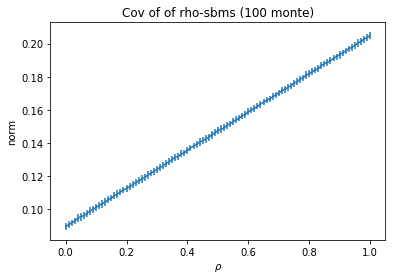

In [7]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        A = A.ravel()
        B = B.ravel()
        diffs.append(np.cov(A.ravel(),B.ravel())[0,1])
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('Cov of of rho-sbms (100 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()

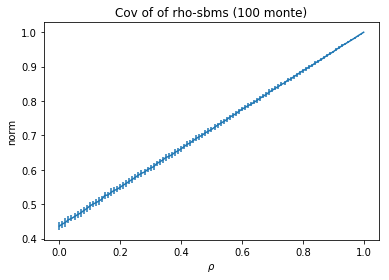

In [8]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        A = A.ravel()
        B = B.ravel()
        x = np.vstack((A.ravel(),B.ravel()))
        diffs.append(np.corrcoef(x)[0,1])
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('Cov of of rho-sbms (100 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()